In [1]:
import pandas as pd
df_91_20=pd.read_csv('https://data.public.lu/fr/datasets/r/850ca2c2-88c5-4518-bf57-3fec2008821d',delimiter=";", encoding = "ISO-8859-1")
df_81_10=pd.read_csv('https://data.public.lu/fr/datasets/r/4f4c8a32-84bf-4098-95eb-696e7e4ba3ec',delimiter=";", encoding = "ISO-8859-1")

In [2]:
df_91_20.head()

,MONTH,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,NM_T (°C),1.4,2.2,5.7,9.6,13.5,16.7,18.7,18.4,14.3,9.9,5.2,2.3
1,NM_XT (°C),3.8,5.2,9.8,14.4,18.4,21.7,23.9,23.5,19.0,13.5,7.7,4.5
2,NM_NT (°C),-1.0,-0.7,2.0,5.1,8.7,11.8,13.8,13.6,10.3,6.6,2.8,0.0
3,NM_RR06_06 (mm),71.5,59.5,56.6,49.4,73.3,73.0,72.1,71.9,66.6,76.2,71.7,89.5
4,NM_INS (hours),52.0,79.5,137.1,197.5,226.3,241.2,257.6,237.1,174.9,106.7,51.1,41.9


In [3]:
df_81_10.head()

,MONTH,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,NM_T (°C),0.8,1.6,5.2,8.7,13.0,15.9,18.2,17.7,13.9,9.5,4.7,1.8
1,NM_XT (°C),3.1,4.7,9.1,13.3,17.8,20.7,23.3,22.8,18.4,13.1,7.3,3.9
2,NM_NT (°C),-1.6,-1.3,1.6,4.4,8.4,11.1,13.3,13.0,10.0,6.3,2.2,-0.5
3,NM_RR06_06 (mm),76.6,62.5,69.1,58.2,78.5,79.9,71.0,75.4,76.3,86.8,76.0,86.7
4,NM_INS (hours),50.3,83.6,125.1,181.6,213.4,227.0,250.3,230.8,161.9,105.9,54.2,41.0


In [4]:

df_91_20.rename(columns={'MONTH': 'Parameters' }, inplace=True)
#print(df_91_20)

print("\n")

df_81_10.rename(columns={'MONTH': 'Parameters' }, inplace=True)
#print(df_81_10)

df_91_20=df_91_20.set_index('Parameters')
df_81_10=df_81_10.set_index('Parameters')


In [54]:
print('These are the data types before transformation:', df_91_20.dtypes)
print('Datatypes before', df_81_10.dtypes)

df_91_20.transform(pd.to_numeric, errors='coerce').fillna(0)

for c in df_81_10.columns:
    if df_81_10[c].dtype=='object':
        df_81_10[c] = df_81_10[c].str.extract('(\d+)', expand=False)
df_81_10 = df_81_10.astype('float64')

print(df_91_20.dtypes)
print(df_81_10.dtypes)

These are the data types before transformation: JAN    float64
FEB    float64
MAR    float64
APR    float64
MAY    float64
JUN    float64
JUL    float64
AUG    float64
SEP    float64
OCT    float64
NOV    float64
DEC    float64
dtype: object
Datatypes before JAN    float64
FEB    float64
MAR    float64
APR    float64
MAY    float64
JUN    float64
JUL    float64
AUG    float64
SEP    float64
OCT    float64
NOV    float64
DEC    float64
dtype: object
JAN    float64
FEB    float64
MAR    float64
APR    float64
MAY    float64
JUN    float64
JUL    float64
AUG    float64
SEP    float64
OCT    float64
NOV    float64
DEC    float64
dtype: object
JAN    float64
FEB    float64
MAR    float64
APR    float64
MAY    float64
JUN    float64
JUL    float64
AUG    float64
SEP    float64
OCT    float64
NOV    float64
DEC    float64
dtype: object


In [6]:
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt 

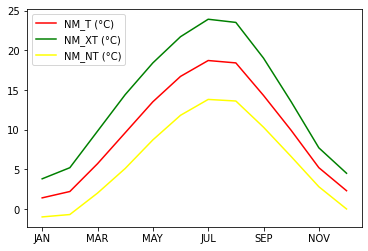

In [7]:
ax = df_91_20.loc['NM_T (°C)'].plot(color='red')
ax = df_91_20.loc['NM_XT (°C)'].plot(color='green')
ax = df_91_20.loc['NM_NT (°C)'].plot(color='yellow') 
ax.legend(["NM_T (°C)", "NM_XT (°C)", "NM_NT (°C)"])

<AxesSubplot:>

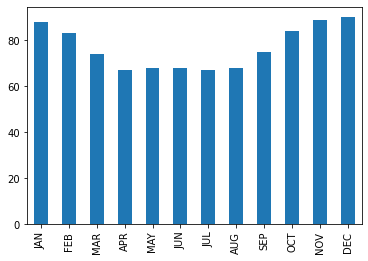

In [8]:
df_91_20.loc['NM_U (%)'].plot(kind='bar')

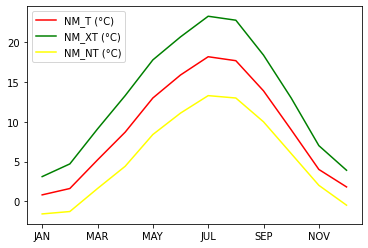

In [9]:
ax = df_81_10.loc['NM_T (°C)'].plot(color='red')
ax = df_81_10.loc['NM_XT (°C)'].plot(color='green')
ax = df_81_10.loc['NM_NT (°C)'].plot(color='yellow') 
ax.legend(["NM_T (°C)", "NM_XT (°C)", "NM_NT (°C)"])

<AxesSubplot:>

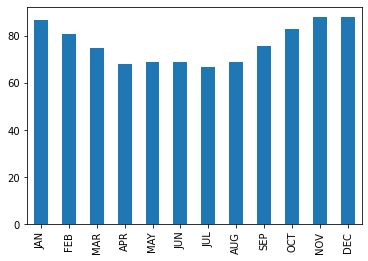

In [10]:
df_81_10.loc['NM_U (%)'].plot(kind='bar')

In [11]:
df_diff = df_91_20 - df_81_10
df_diff["Q1"] = df_diff['JAN']+df_diff['FEB']+df_diff['MAR']
df_diff["Q2"] = df_diff['APR']+df_diff['MAY']+df_diff['JUN']
df_diff["Q3"] = df_diff['JUL']+df_diff['AUG']+df_diff['SEP']
df_diff["Q4"] = df_diff['OCT']+df_diff['NOV']+df_diff['DEC']
for i in df_81_10.columns:
    del df_diff[i]
df_diff

,Q1,Q2,Q3,Q4
Parameters,,,,
NM_T (°C),1.7,2.2,1.600000e+00,2.600000e+00
NM_XT (°C),1.9,2.7,1.900000e+00,1.800000e+00
NM_NT (°C),1.6,1.7,1.400000e+00,1.900000e+00
NM_RR06_06 (mm),-20.6,-20.9,-1.210000e+01,-1.130000e+01
NM_INS (hours),9.6,43.0,2.660000e+01,-3.000000e-01
NM_U (%),2.0,-3.0,-2.000000e+00,4.000000e+00
NM_QFF (hPa),0.0,0.0,0.000000e+00,9.000000e-01
NM_ODRR01 (days),0.1,-2.0,-1.776357e-15,1.900000e+00
NM_OFOG (days),-2.1,-3.0,-1.900000e+00,-2.300000e+00


In [12]:
AirTempCheck = ( (df_diff.loc['NM_T (°C)'].sum()) / 4 ) < 1
AirTempCheck 

False

In [13]:
df_diff = df_91_20 - df_81_10
FogDescCheck = ( df_diff['DEC']['NM_OFOG (days)'] + df_diff['JAN']['NM_OFOG (days)'] + df_diff['FEB']['NM_OFOG (days)'] + df_diff['MAR']['NM_OFOG (days)'] ) < 0
FogDescCheck

True

In [30]:
first=df_91_20.iloc[3].diff()
second=df_81_10.iloc[3].diff()
first_pattern = first>0
second_pattern = second>0
compare=first_pattern.equals(second_pattern)
compare

False

In [49]:
df_diff = df_91_20 - df_81_10
df_diff["Q1"] = df_diff['JAN']+df_diff['FEB']+df_diff['MAR']
df_diff["Q2"] = df_diff['APR']+df_diff['MAY']+df_diff['JUN']
df_diff["Q3"] = df_diff['JUL']+df_diff['AUG']+df_diff['SEP']
df_diff["Q4"] = df_diff['OCT']+df_diff['NOV']+df_diff['DEC']
df_diff["Q1+Q2+Q3+Q4"] = abs(df_diff["Q1"]+df_diff["Q2"]+df_diff["Q3"]+df_diff["Q4"])  
#Calculated the sum of the differences according to the quarterly so we can easily calculate which variable changed the most and which the least
Sort1=df_diff.sort_values(by=["Q1+Q2+Q3+Q4"])
print(Sort1)

new_Data=df_diff["Q1+Q2+Q3+Q4"] 

new_df=pd.DataFrame(new_Data)

new_df.head(10)

Sortedf=new_df.sort_values(by=["Q1+Q2+Q3+Q4"])

print(Sortedf)
print("\nThe three most changed parameters:\n")
print(Sortedf.iloc[-3:]) 
print("\nThe three least changed parameters:\n")
print(Sortedf.iloc[0:3])

                        JAN  FEB   MAR   APR   MAY   JUN  JUL  AUG   SEP  OCT  \
Parameters                                                                      
NM_ODRR01 (days)        0.3  1.1  -1.3  -1.0  -0.4  -0.6  0.7  0.1  -0.8  0.2   
NM_OGLAZE (days)       -0.5 -0.1   0.1   0.0   0.0   0.0  0.0  0.0   0.0  0.0   
NM_QFF (hPa)            0.0  0.0   0.0   0.0   0.0   0.0  0.0  0.0   0.0  0.5   
NM_U (%)                1.0  2.0  -1.0  -1.0  -1.0  -1.0  0.0 -1.0  -1.0  1.0   
NM_ODXT30 (days)        0.0  0.0   0.0   0.0   0.1   0.8  1.0  1.3  -0.1  0.0   
NM_OSNOW (days)        -1.1 -0.4  -1.1  -0.6   0.0   0.0  0.0  0.0   0.0  0.1   
NM_ODXT0 (days)        -1.0 -1.0   0.1   0.0   0.0   0.0  0.0  0.0   0.0  0.0   
NM_OCASETHSTORM (days)  0.0 -0.2  -0.4  -0.1  -0.5  -1.1 -0.2 -0.3  -0.8  0.0   
NM_OGROUNDSNOW (days)  -1.3 -0.7  -0.9  -0.4   0.0   0.0  0.0  0.0   0.0  0.0   
NM_ODXT25 (days)        0.0  0.0   0.0   0.2   0.6   1.4  1.3  1.1   0.8  0.1   
NM_NT (°C)              0.6 

In [52]:
print("\n Correlations of: \n")
Sortedf.corr(method ='pearson')



 Correlations of: 



,Q1+Q2+Q3+Q4
Q1+Q2+Q3+Q4,1.0


In [18]:
df_temp_81_20 = pd.concat( [ pd.concat([df_91_20.loc['NM_T (°C)'], df_91_20.loc['NM_ODRR01 (days)']], axis=1), pd.concat([df_81_10.loc['NM_T (°C)'], df_81_10.loc['NM_ODRR01 (days)']], axis=1) ], axis=1)
df_temp_81_20

,NM_T (°C),NM_ODRR01 (days),NM_T (°C),NM_ODRR01 (days)
JAN,1.4,17.3,0.8,17.0
FEB,2.2,15.4,1.6,14.3
MAR,5.7,14.8,5.2,16.1
APR,9.6,12.7,8.7,13.7
MAY,13.5,14.0,13.0,14.4
JUN,16.7,13.3,15.9,13.9
JUL,18.7,13.7,18.2,13.0
AUG,18.4,13.2,17.7,13.1
SEP,14.3,12.2,13.9,13.0
OCT,9.9,15.2,9.0,15.0


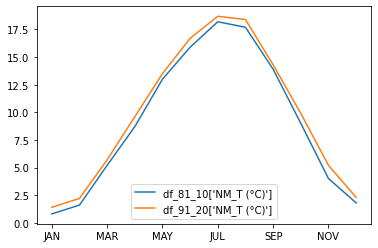

In [19]:
ax = df_81_10.loc['NM_T (°C)'].plot()
ax=df_91_20.loc['NM_T (°C)'].plot()
ax.legend(["df_81_10['NM_T (°C)']", "df_91_20['NM_T (°C)']"])